In [1]:
!pip install statsbombpy

In [2]:
!pip install mplsoccer

In [3]:
from statsbombpy import sb

In [4]:
events = sb.events(match_id = 18235)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [5]:
events = events[['team','type','minute','location','pass_end_location','player','pass_recipient']]

In [6]:
events_1=events[events['team']=='Bayern Munich']
events_1

,team,type,minute,location,pass_end_location,player,pass_recipient
0,Bayern Munich,Starting XI,0,NaN,NaN,NaN,NaN
3,Bayern Munich,Half Start,0,NaN,NaN,NaN,NaN
4,Bayern Munich,Half Start,45,NaN,NaN,NaN,NaN
10,Bayern Munich,Pass,0,"[39.0, 27.0]","[46.0, 6.0]",Daniel Van Buyten,NaN
13,Bayern Munich,Pass,0,"[36.0, 18.0]","[54.0, 15.0]",Mark van Bommel,NaN
...,...,...,...,...,...,...,...
3399,Bayern Munich,Shield,51,"[3.0, 9.0]",NaN,Martín Gastón Demichelis,NaN
3400,Bayern Munich,Substitution,62,NaN,NaN,Hamit Altıntop,NaN
3402,Bayern Munich,Substitution,73,NaN,NaN,Ivica Olić,NaN
3405,Bayern Munich,Tactical Shift,63,NaN,NaN,NaN,NaN


In [7]:
events_1[events_1['type']=='Substitution']

,team,type,minute,location,pass_end_location,player,pass_recipient
3400,Bayern Munich,Substitution,62,NaN,NaN,Hamit Altıntop,NaN
3402,Bayern Munich,Substitution,73,NaN,NaN,Ivica Olić,NaN


In [8]:
pass_events=events_1[events_1['type']=='Pass'].reset_index()
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,10,Bayern Munich,Pass,0,"[39.0, 27.0]","[46.0, 6.0]",Daniel Van Buyten,NaN
1,13,Bayern Munich,Pass,0,"[36.0, 18.0]","[54.0, 15.0]",Mark van Bommel,NaN
2,18,Bayern Munich,Pass,0,"[23.0, 55.0]","[33.0, 56.0]",Daniel Van Buyten,Philipp Lahm
3,19,Bayern Munich,Pass,0,"[34.0, 56.0]","[16.0, 58.0]",Philipp Lahm,Daniel Van Buyten
4,20,Bayern Munich,Pass,0,"[2.0, 67.0]","[14.0, 80.0]",Daniel Van Buyten,NaN
...,...,...,...,...,...,...,...,...
630,933,Bayern Munich,Pass,92,"[53.0, 32.0]","[58.0, 26.0]",Mark van Bommel,Bastian Schweinsteiger
631,934,Bayern Munich,Pass,92,"[60.0, 24.0]","[74.0, 6.0]",Bastian Schweinsteiger,Thomas Müller
632,935,Bayern Munich,Pass,92,"[91.0, 12.0]","[76.0, 20.0]",Thomas Müller,Bastian Schweinsteiger
633,936,Bayern Munich,Pass,92,"[77.0, 21.0]","[77.0, 49.0]",Bastian Schweinsteiger,Mark van Bommel


In [9]:
pass_events=pass_events[pass_events['minute']<62]
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,10,Bayern Munich,Pass,0,"[39.0, 27.0]","[46.0, 6.0]",Daniel Van Buyten,NaN
1,13,Bayern Munich,Pass,0,"[36.0, 18.0]","[54.0, 15.0]",Mark van Bommel,NaN
2,18,Bayern Munich,Pass,0,"[23.0, 55.0]","[33.0, 56.0]",Daniel Van Buyten,Philipp Lahm
3,19,Bayern Munich,Pass,0,"[34.0, 56.0]","[16.0, 58.0]",Philipp Lahm,Daniel Van Buyten
4,20,Bayern Munich,Pass,0,"[2.0, 67.0]","[14.0, 80.0]",Daniel Van Buyten,NaN
...,...,...,...,...,...,...,...,...
435,655,Bayern Munich,Pass,61,"[89.0, 25.0]","[93.0, 48.0]",Bastian Schweinsteiger,Thomas Müller
436,656,Bayern Munich,Pass,61,"[93.0, 48.0]","[86.0, 30.0]",Thomas Müller,Bastian Schweinsteiger
437,657,Bayern Munich,Pass,61,"[85.0, 31.0]","[76.0, 45.0]",Bastian Schweinsteiger,Mark van Bommel
438,658,Bayern Munich,Pass,61,"[75.0, 46.0]","[76.0, 72.0]",Mark van Bommel,Philipp Lahm


In [10]:
passes_between=pass_events.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
passes_between

,player,pass_recipient,type
0,Arjen Robben,Bastian Schweinsteiger,6
1,Arjen Robben,Daniel Van Buyten,1
2,Arjen Robben,Hamit Altıntop,1
3,Arjen Robben,Holger Badstuber,1
4,Arjen Robben,Ivica Olić,4
...,...,...,...
82,Thomas Müller,Hamit Altıntop,1
83,Thomas Müller,Holger Badstuber,2
84,Thomas Müller,Mark van Bommel,1
85,Thomas Müller,Martín Gastón Demichelis,1


In [11]:
#for all events for france
game=events_1[(events_1['player'].isin(passes_between['player'])) & (events_1['pass_recipient'].isin(passes_between['pass_recipient']))]
game['pass_recipient'].nunique()

11

In [12]:
game=game.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
game

,player,pass_recipient,type
0,Arjen Robben,Bastian Schweinsteiger,11
1,Arjen Robben,Daniel Van Buyten,1
2,Arjen Robben,Hamit Altıntop,1
3,Arjen Robben,Holger Badstuber,1
4,Arjen Robben,Ivica Olić,4
...,...,...,...
85,Thomas Müller,Hamit Altıntop,1
86,Thomas Müller,Holger Badstuber,3
87,Thomas Müller,Mark van Bommel,3
88,Thomas Müller,Martín Gastón Demichelis,1


In [13]:
game.rename(columns={'type':'pass_count'},inplace=True)

In [14]:
desc=game.describe()
threshold=desc.iloc[4]
thresh=threshold.item()
game=game[game['pass_count']>thresh].reset_index(drop=True)
game.describe()

,pass_count
count,58.000000
mean,9.086207
std,6.235958
min,3.000000
25%,4.000000
50%,7.500000
75%,11.750000
max,30.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
scaler.fit(game['pass_count'].values.reshape(-1,1))
game['pass_count']=scaler.transform(game['pass_count'].values.reshape(-1,1))
game

,player,pass_recipient,pass_count
0,Arjen Robben,Bastian Schweinsteiger,2.962963
1,Arjen Robben,Ivica Olić,0.370370
2,Arjen Robben,Mark van Bommel,1.481481
3,Arjen Robben,Philipp Lahm,5.185185
4,Arjen Robben,Thomas Müller,2.962963
5,Bastian Schweinsteiger,Arjen Robben,2.962963
6,Bastian Schweinsteiger,Daniel Van Buyten,0.000000
7,Bastian Schweinsteiger,Hamit Altıntop,3.333333
8,Bastian Schweinsteiger,Holger Badstuber,7.777778
9,Bastian Schweinsteiger,Ivica Olić,0.370370


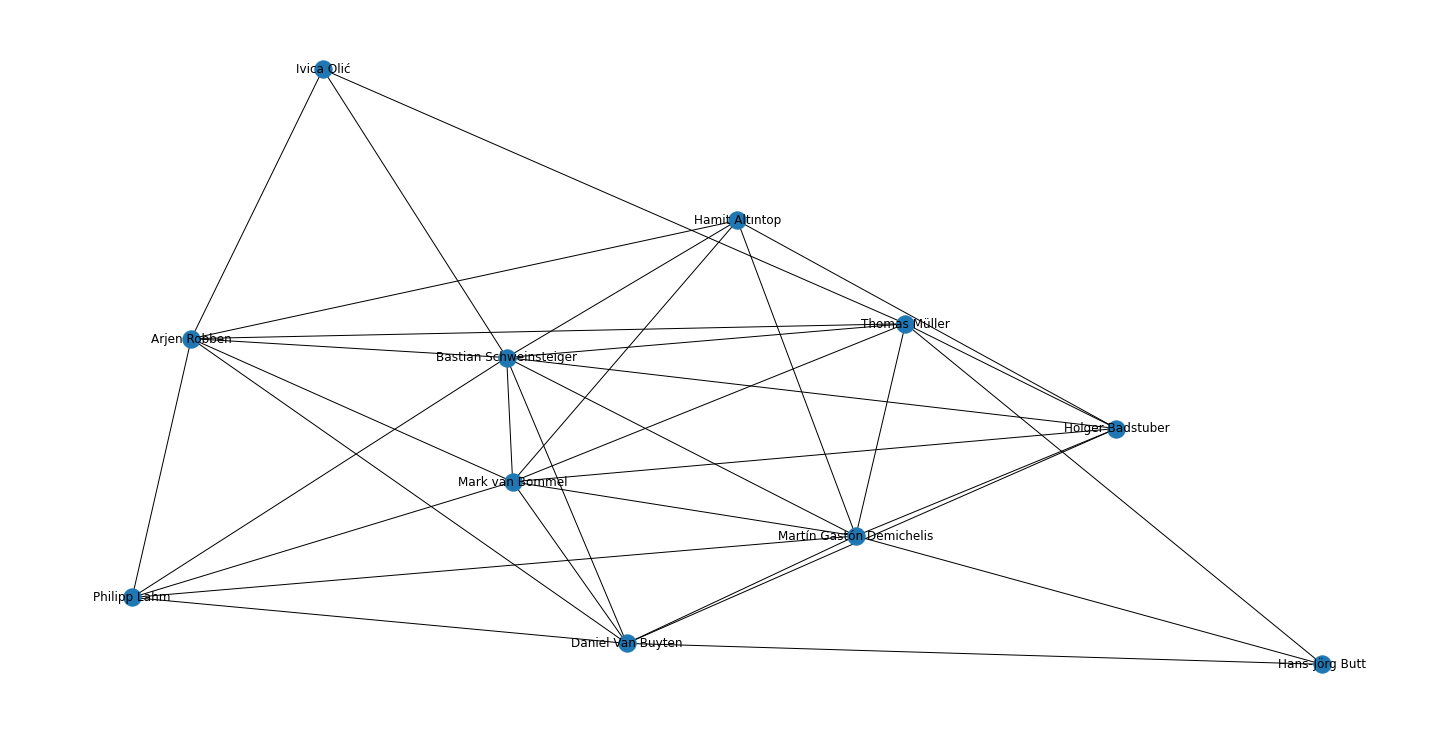

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
# Build your graph
G=nx.from_pandas_edgelist(game, 'player', 'pass_recipient',edge_attr='pass_count')
 
# Plot it
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)
plt.show()

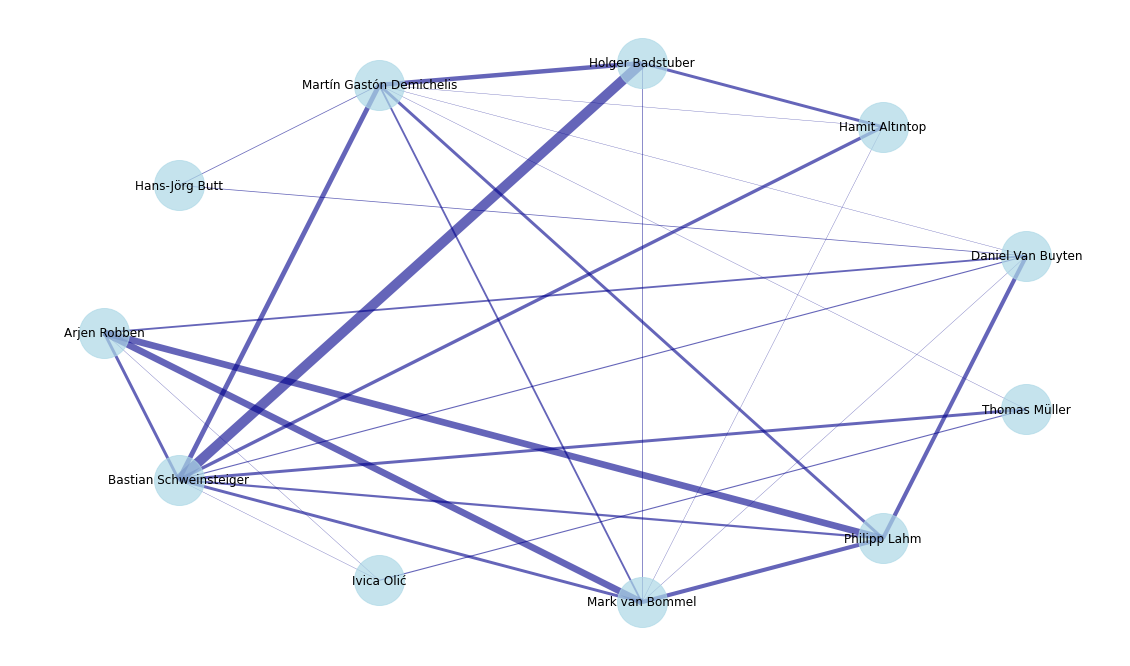

In [17]:
widths = nx.get_edge_attributes(G, 'pass_count')
nodelist = G.nodes()

plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=2500,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='darkblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

In [18]:
import pandas as pd
df3 = pd.DataFrame(events_1)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
0,Bayern Munich,Starting XI,0,NaN,NaN,NaN,NaN
3,Bayern Munich,Half Start,0,NaN,NaN,NaN,NaN
4,Bayern Munich,Half Start,45,NaN,NaN,NaN,NaN
10,Bayern Munich,Pass,0,"[39.0, 27.0]","[46.0, 6.0]",Daniel Van Buyten,NaN
13,Bayern Munich,Pass,0,"[36.0, 18.0]","[54.0, 15.0]",Mark van Bommel,NaN
...,...,...,...,...,...,...,...
3399,Bayern Munich,Shield,51,"[3.0, 9.0]",NaN,Martín Gastón Demichelis,NaN
3400,Bayern Munich,Substitution,62,NaN,NaN,Hamit Altıntop,NaN
3402,Bayern Munich,Substitution,73,NaN,NaN,Ivica Olić,NaN
3405,Bayern Munich,Tactical Shift,63,NaN,NaN,NaN,NaN


In [19]:
df3=df3[df3['player'].notna()]
df3=df3[df3['location'].notna()]
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
10,Bayern Munich,Pass,0,"[39.0, 27.0]","[46.0, 6.0]",Daniel Van Buyten,NaN
13,Bayern Munich,Pass,0,"[36.0, 18.0]","[54.0, 15.0]",Mark van Bommel,NaN
18,Bayern Munich,Pass,0,"[23.0, 55.0]","[33.0, 56.0]",Daniel Van Buyten,Philipp Lahm
19,Bayern Munich,Pass,0,"[34.0, 56.0]","[16.0, 58.0]",Philipp Lahm,Daniel Van Buyten
20,Bayern Munich,Pass,0,"[2.0, 67.0]","[14.0, 80.0]",Daniel Van Buyten,NaN
...,...,...,...,...,...,...,...
3390,Bayern Munich,Shot,69,"[110.0, 47.0]",NaN,Ivica Olić,NaN
3392,Bayern Munich,Shot,80,"[95.0, 59.0]",NaN,Arjen Robben,NaN
3393,Bayern Munich,Shot,82,"[92.0, 33.0]",NaN,Arjen Robben,NaN
3394,Bayern Munich,Shot,90,"[90.0, 49.0]",NaN,Mark van Bommel,NaN


In [20]:
df3[['locationx','locationy']] = pd.DataFrame(df3.location.tolist(), index= df3.index)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient,locationx,locationy
10,Bayern Munich,Pass,0,"[39.0, 27.0]","[46.0, 6.0]",Daniel Van Buyten,NaN,39.0,27.0
13,Bayern Munich,Pass,0,"[36.0, 18.0]","[54.0, 15.0]",Mark van Bommel,NaN,36.0,18.0
18,Bayern Munich,Pass,0,"[23.0, 55.0]","[33.0, 56.0]",Daniel Van Buyten,Philipp Lahm,23.0,55.0
19,Bayern Munich,Pass,0,"[34.0, 56.0]","[16.0, 58.0]",Philipp Lahm,Daniel Van Buyten,34.0,56.0
20,Bayern Munich,Pass,0,"[2.0, 67.0]","[14.0, 80.0]",Daniel Van Buyten,NaN,2.0,67.0
...,...,...,...,...,...,...,...,...,...
3390,Bayern Munich,Shot,69,"[110.0, 47.0]",NaN,Ivica Olić,NaN,110.0,47.0
3392,Bayern Munich,Shot,80,"[95.0, 59.0]",NaN,Arjen Robben,NaN,95.0,59.0
3393,Bayern Munich,Shot,82,"[92.0, 33.0]",NaN,Arjen Robben,NaN,92.0,33.0
3394,Bayern Munich,Shot,90,"[90.0, 49.0]",NaN,Mark van Bommel,NaN,90.0,49.0


In [21]:
df3=df3.groupby(by=['player'],as_index=False).agg({'locationx':'mean','locationy':'mean'})
df3

,player,locationx,locationy
0,Arjen Robben,86.341463,66.589431
1,Bastian Schweinsteiger,63.911357,29.484765
2,Daniel Van Buyten,44.119497,57.509434
3,Hamit Altıntop,72.708333,16.034722
4,Hans-Jörg Butt,10.565217,40.260870
5,Holger Badstuber,65.387097,11.470046
6,Ivica Olić,89.694444,36.583333
7,Mario Gómez García,85.153846,39.076923
8,Mark van Bommel,62.498168,47.186813
9,Martín Gastón Demichelis,38.767956,33.928177


In [22]:
df3=df3[df3['player'].isin(game['player'].unique())].reset_index(drop=True)

In [23]:
df3.loc[(df3['locationy']<50.0),'location_y']=(100-df3['locationy'])
df3.loc[(df3['locationy']>50.0),'location_y']=(100-df3['locationy'])
df3

,player,locationx,locationy,location_y
0,Arjen Robben,86.341463,66.589431,33.410569
1,Bastian Schweinsteiger,63.911357,29.484765,70.515235
2,Daniel Van Buyten,44.119497,57.509434,42.490566
3,Hamit Altıntop,72.708333,16.034722,83.965278
4,Hans-Jörg Butt,10.565217,40.260870,59.739130
5,Holger Badstuber,65.387097,11.470046,88.529954
6,Ivica Olić,89.694444,36.583333,63.416667
7,Mark van Bommel,62.498168,47.186813,52.813187
8,Martín Gastón Demichelis,38.767956,33.928177,66.071823
9,Philipp Lahm,63.332016,69.470356,30.529644


In [24]:
df3.set_index('player',inplace=True)

In [25]:

!pip install highlight_text

In [26]:
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


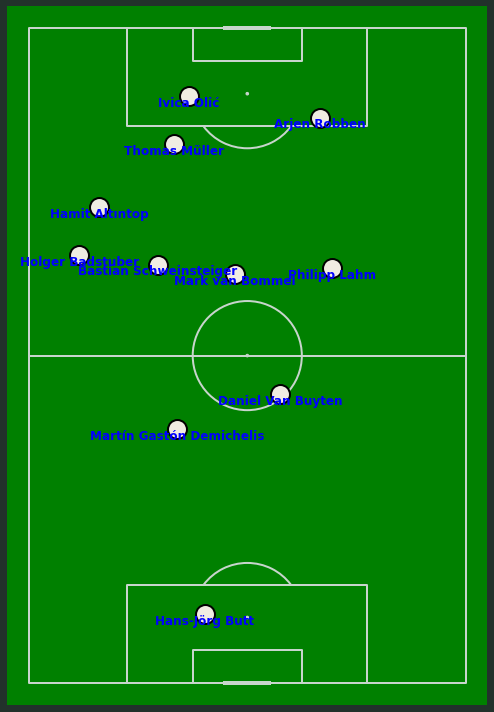

In [27]:
#plotting the average location for the players
#Make arrows less transparent if they have a higher count, totally optional of course
from mplsoccer import Pitch, VerticalPitch
import numpy as np
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(df3), 1))


#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='green', line_color='#c7d5cc', figsize=(20, 1),
              constrained_layout=True, tight_layout=False,half=False)
fig, ax = pitch.draw(figsize=(20,10))



''' 
pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
                         1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
                         headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

ax.add_patch(arrow)
 '''
#plot nodes
pass_nodes = pitch.scatter(1.2*df3.locationx, 80-0.8*df3.location_y,s=360,
                           color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
# pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 5 Times", (-4, 40), color='w',
#                fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono")


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in df3.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.locationx, 80-0.8*row.location_y), c='blue', va='top', ha='center', size=12, fontweight='bold', fontfamily="Calibri",ax=ax)

#Set the background color
fig.patch.set_facecolor('#22312b')


In [28]:
nx.write_gml(G, "BayernvInter(Bayern).gml")